# WeatherPy
----

### Analysis as of 03/04/2019 based off of:
* Latitude vs. Max Temperature Plot
    * Temperatures are at its highest closest to the equater(Lat = 0)
    * The Southern hemisphere(Lat > 0) is warmer than the Northern hemisphere(Lat < 0) this time of year

* Latitude vs. Humidity Plot
    * No strong relationship between the latitude and humidity
  
* Latitude vs. Cloudiness Plot
    * No strong relationship between latitude and cloudiness. 
    * However, it is interesting to see that a strong band of cities sits at 0, 79, and 90% cloudiness.
    
* Latitude vs. Wind Speed Plot
    * No strong relationship between latitude and wind speed for both hemispheres. 
    * Maority of the cities have wind speed of under 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Paramaters for query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = api_key

# Build partial query URL - without city
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_name = []

# set up a counter to print out
counter = 0

# print the start of the API call
print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and retrieve data on cloudiness, country, 
# date, humidity, lat, lng , Max Temperature, and Wind Speed
for city in cities:
    try:
        counter += 1
        print(f"Processing Record {counter} | {city}")
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
    except:
        print("-----Error: Data not found...Skip-----")
        
print("------------------------")        
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 1 | port lincoln
Processing Record 2 | yellowknife
Processing Record 3 | namatanai
Processing Record 4 | vaini
Processing Record 5 | atuona
Processing Record 6 | arraial do cabo
Processing Record 7 | arlit
Processing Record 8 | ambon
Processing Record 9 | tres arroyos
Processing Record 10 | bluff
Processing Record 11 | samusu
-----Error: Data not found...Skip-----
Processing Record 12 | qaanaaq
Processing Record 13 | ulety
Processing Record 14 | ribeira grande
Processing Record 15 | lolua
-----Error: Data not found...Skip-----
Processing Record 16 | torbay
Processing Record 17 | severo-kurilsk
Processing Record 18 | tumannyy
-----Error: Data not found...Skip-----
Processing Record 19 | san pedro
Processing Record 20 | jiddah
-----Error: Data not found...Skip-----
Processing Record 21 | baoding
Processing Record 22 | puerto ayora
Processing Record 23 | punta arenas
Processing Record 24 | rovaniemi
Processing Record 25 |

Processing Record 220 | haines junction
Processing Record 221 | kaliua
Processing Record 222 | novyy urengoy
Processing Record 223 | palabuhanratu
-----Error: Data not found...Skip-----
Processing Record 224 | vaitupu
-----Error: Data not found...Skip-----
Processing Record 225 | liepaja
Processing Record 226 | dong xoai
Processing Record 227 | barrow
Processing Record 228 | ostrovnoy
Processing Record 229 | ancud
Processing Record 230 | hobart
Processing Record 231 | lavrentiya
Processing Record 232 | tyukhtet
Processing Record 233 | ijaki
-----Error: Data not found...Skip-----
Processing Record 234 | port blair
Processing Record 235 | rancho palos verdes
Processing Record 236 | beringovskiy
Processing Record 237 | karauzyak
-----Error: Data not found...Skip-----
Processing Record 238 | vostok
Processing Record 239 | ekhabi
Processing Record 240 | ahar
Processing Record 241 | college
Processing Record 242 | pevek
Processing Record 243 | salinopolis
Processing Record 244 | fuerte
Proce

Processing Record 434 | abrau-dyurso
Processing Record 435 | mercedes
Processing Record 436 | herat
Processing Record 437 | lazaro cardenas
Processing Record 438 | yabassi
Processing Record 439 | dinsor
-----Error: Data not found...Skip-----
Processing Record 440 | aosta
Processing Record 441 | taicheng
Processing Record 442 | nabire
Processing Record 443 | itoman
Processing Record 444 | tucurui
Processing Record 445 | marcona
-----Error: Data not found...Skip-----
Processing Record 446 | tarakan
Processing Record 447 | kamenka
Processing Record 448 | vuktyl
Processing Record 449 | gat
Processing Record 450 | shenjiamen
Processing Record 451 | port hedland
Processing Record 452 | nanortalik
Processing Record 453 | east stroudsburg
Processing Record 454 | ugoofaaru
Processing Record 455 | nikolayevsk-na-amure
Processing Record 456 | mergui
-----Error: Data not found...Skip-----
Processing Record 457 | kinshasa
Processing Record 458 | pangkalanbuun
Processing Record 459 | bam
Processing 

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary from the list above to be able to convert into dataframe(df)
weather_dict = {
    'City':city_name, 
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Latitude':lat,
    'Longitude':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}


In [5]:
# Convert my dictionary into a dataframe(df)
weather_df = pd.DataFrame(weather_dict)

# Output File (CSV)
weather_df.to_csv("Weather_data.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Port Lincoln,64,AU,1551767845,89,-34.72,135.86,69.26,16.49
1,Yellowknife,5,CA,1551767805,78,62.45,-114.38,8.60,8.05
2,Namatanai,36,PG,1551768086,93,-3.66,152.44,85.28,5.64
3,Vaini,0,IN,1551765600,29,15.34,74.49,87.80,9.17
4,Atuona,12,PF,1551767354,100,-9.80,-139.03,82.13,13.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

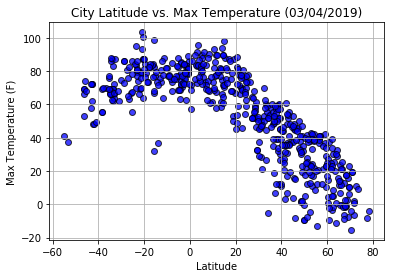

In [6]:
# Scatter plot for Latitude vs. Max Temperature Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Max Temp'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

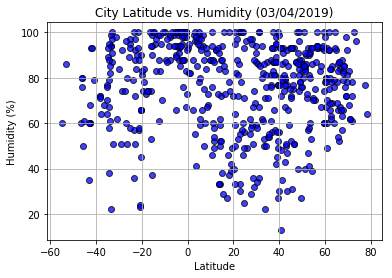

In [7]:
# Scatter plot for Latitude vs. Humidity Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Humidity'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

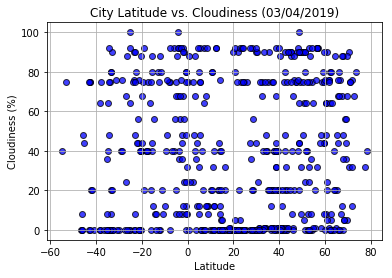

In [8]:
# Scatter plot for Latitude vs. Cloudiness Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Cloudiness'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

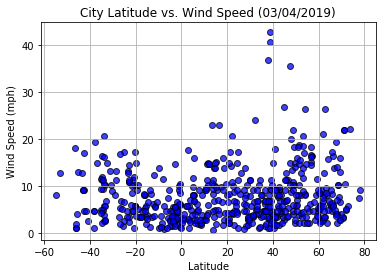

In [9]:
# Scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Wind Speed'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Wind.png")

# Show plot
plt.show()